In [1]:
#import packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



In [2]:
#import dataset and print first 5 rows
data = pd.read_csv('creditcard.csv')
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.shape

(284807, 31)

In [5]:
#check for duplicates in data
data.duplicated().sum()

1081

In [6]:
data = data.drop_duplicates()

In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#determining the fruad transactions from the normal ones
# 1 = fraud 0 = normal
data['Class'].value_counts()


Class
0    283253
1       473
Name: count, dtype: int64

In [9]:
normal = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]

In [10]:
normal.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud["Amount"].describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
pip install imbalanced-learn


In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
# split data into features and response
x = data.drop(columns = "Class" , axis =1)
y = data["Class"]

In [15]:
#split data into train and test set
xtrain, xtest, ytrain, ytest = train_test_split(x , y , random_state = 42, test_size = 0.2, stratify=y)

In [16]:
#create smote instance
smote = SMOTE(random_state=42)

# Apply SMOTE only on training data
X_train_smote, y_train_smote = smote.fit_resample(xtrain, ytrain)


In [17]:
#printing out the the number of training data before and after smote
print("Before SMOTE:", ytrain.value_counts())   
print("After SMOTE:", y_train_smote.value_counts()) 


Before SMOTE: Class
0    226602
1       378
Name: count, dtype: int64
After SMOTE: Class
0    226602
1    226602
Name: count, dtype: int64


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [19]:
#initiate random forest model
model = LogisticRegression()


In [20]:
#fit data into the model
model.fit(X_train_smote,y_train_smote)

LogisticRegression()

In [21]:
y_pred = model.predict(xtest)

In [22]:
# Evaluate the model
print(classification_report(ytest, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.07      0.88      0.14        95

    accuracy                           0.98     56746
   macro avg       0.54      0.93      0.56     56746
weighted avg       1.00      0.98      0.99     56746



AUC Score: 0.95585937536291


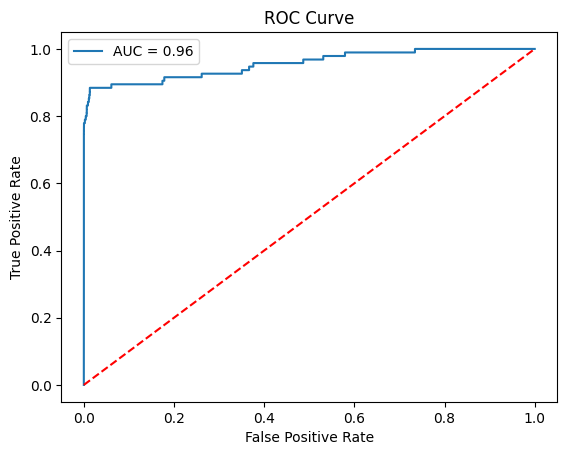

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities (for ROC curve, you need probabilities, not class labels)
y_pred_proba = model.predict_proba(xtest)[:, 1]  # Use probabilities of the positive class (fraud)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(ytest, y_pred_proba)

# Calculate AUC score
auc = roc_auc_score(ytest, y_pred_proba)
print("AUC Score:", auc)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='r')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('auc_curve.png')
plt.show()


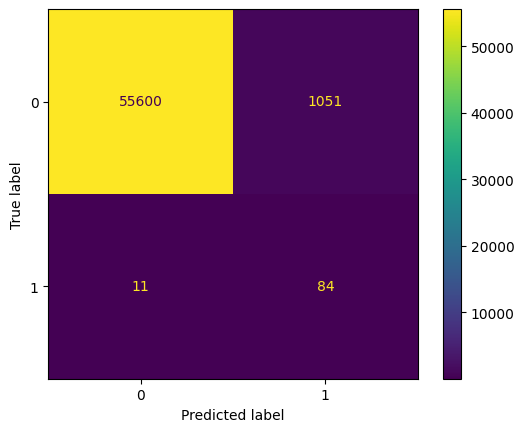

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ytest, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()


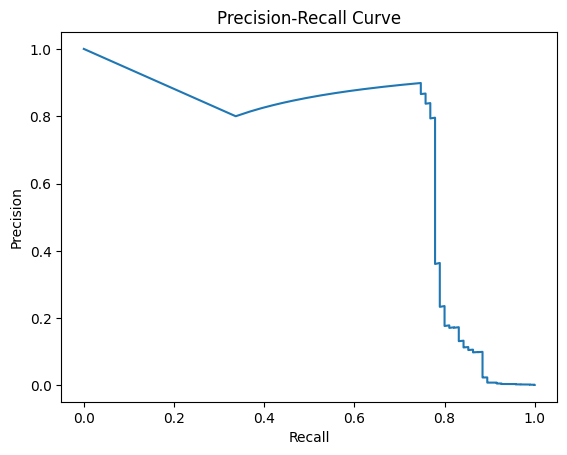

In [25]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(ytest, y_pred_proba)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
